In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
import statistics as stat
import seaborn as sns
%matplotlib inline 

In [2]:
data_frame = pd.read_csv("3.2.3 adult.csv")
data_frame.shape

(32561, 15)

In [3]:
data_frame.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [19]:
def encode_onehot(df, cols):
    """
    One-hot encoding is applied to columns specified in a pandas DataFrame.
    
    Modified from: https://gist.github.com/kljensen/5452382
    
    Details:
    
    http://en.wikipedia.org/wiki/One-hot
    http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
    
    @param df pandas DataFrame
    @param cols a list of columns to encode
    @return a DataFrame with one-hot encoding
    """
    vec = DictVectorizer()
    
    vec_data = pd.DataFrame(vec.fit_transform(df[cols].to_dict('records')).toarray())
    vec_data.columns = vec.get_feature_names()
    vec_data.index = df.index
    
    df = df.drop(cols, axis=1)
    df = df.join(vec_data)
    return df

In [4]:
data_frame.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
data_frame.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [6]:
data_frame.describe(include=[object])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [7]:
print(data_frame.groupby('income').size())

income
<=50K    24720
>50K      7841
dtype: int64


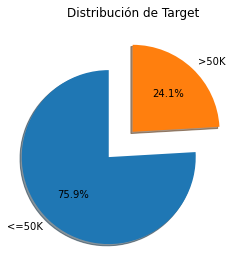

In [8]:
tipos = data_frame['income'].unique()
total = data_frame['income'].value_counts().tolist()
explode = [0.4 if total[0] == max(total) else 0, 0.4 if total[1] == max(total) else 0] # Destacar algunos 
plt.pie(total, labels=tipos, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90) 
plt.title('Distribución de Target')
plt.show()

In [9]:
# Valores nulos
for feature in data_frame.columns:
    print('Total de valores nulos de', feature, '=', data_frame[feature].isna().sum())

Total de valores nulos de age = 0
Total de valores nulos de workclass = 0
Total de valores nulos de fnlwgt = 0
Total de valores nulos de education = 0
Total de valores nulos de education.num = 0
Total de valores nulos de marital.status = 0
Total de valores nulos de occupation = 0
Total de valores nulos de relationship = 0
Total de valores nulos de race = 0
Total de valores nulos de sex = 0
Total de valores nulos de capital.gain = 0
Total de valores nulos de capital.loss = 0
Total de valores nulos de hours.per.week = 0
Total de valores nulos de native.country = 0
Total de valores nulos de income = 0


In [10]:
for feature in data_frame.columns:
    print('Valores únicos de', feature, '=', data_frame[feature].unique())

Valores únicos de age = [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
Valores únicos de workclass = ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Valores únicos de fnlwgt = [ 77053 132870 186061 ...  34066  84661 257302]
Valores únicos de education = ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
Valores únicos de education.num = [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
Valores únicos de marital.status = ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
Valores únicos de occupation = ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 

In [11]:
moda=stat.mode(data_frame["workclass"])
data_frame.loc[data_frame.workclass=='?','workclass']=moda

moda=stat.mode(data_frame["occupation"])
data_frame.loc[data_frame.occupation=='?','occupation']=moda

moda=stat.mode(data_frame["native.country"])
data_frame.loc[data_frame['native.country']=='?','native.country']=moda


In [12]:
for feature in data_frame.columns:
    print('Valores únicos de', feature, '=', data_frame[feature].unique())

Valores únicos de age = [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79 88 84 85 86
 87]
Valores únicos de workclass = ['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
Valores únicos de fnlwgt = [ 77053 132870 186061 ...  34066  84661 257302]
Valores únicos de education = ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
Valores únicos de education.num = [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1]
Valores únicos de marital.status = ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
Valores únicos de occupation = ['Prof-specialty' 'Exec-managerial' 'Machine-op-inspct' 'Other-se

In [13]:
from sklearn.preprocessing import LabelEncoder
data_frame['target'] = np.where(data_frame['income']=='<=50K', 0, 1)

In [14]:
cat_var=[x for x in data_frame.columns if data_frame[x].dtype=="O"]
print(cat_var)
num_var=[x for x in data_frame.columns if x not in cat_var]
print(num_var)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'target']


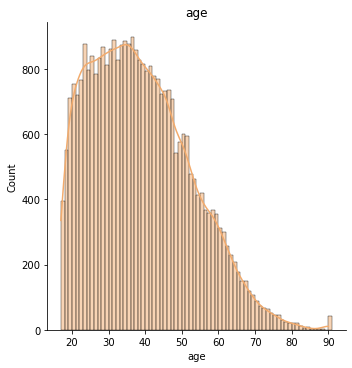

In [ ]:
import seaborn as sns
#columnas = np.array(data_frame[num_var])
columnas = num_var

for col in columnas:
    intervalos = range(min(data_frame[col]), max(data_frame[col]) + 2)
    sns.displot( data_frame[col], color='#F2AB6D', bins=intervalos, kde=True) #creamos el gráfico en Seaborn

    #configuramos en Matplotlib
    #plt.xticks(intervalos)
    plt.title(col)
   # data_frame[col].hist()
    plt.show()


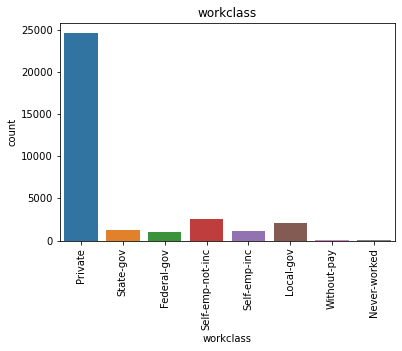

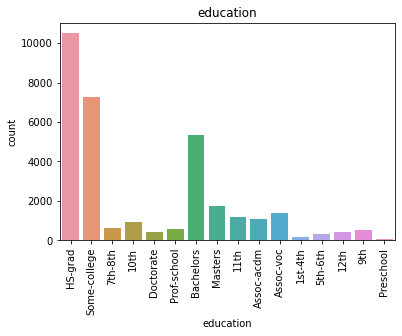

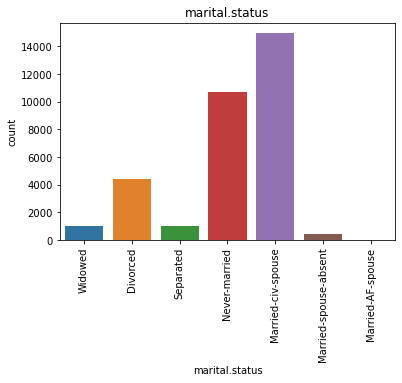

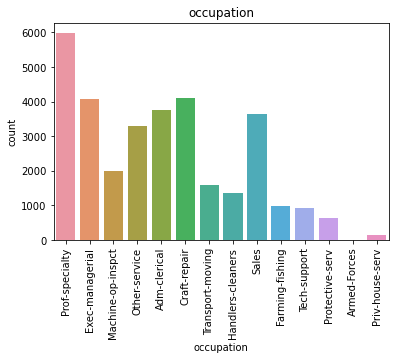

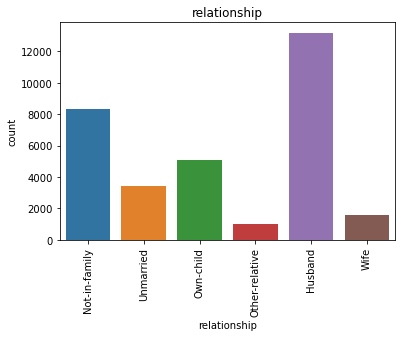

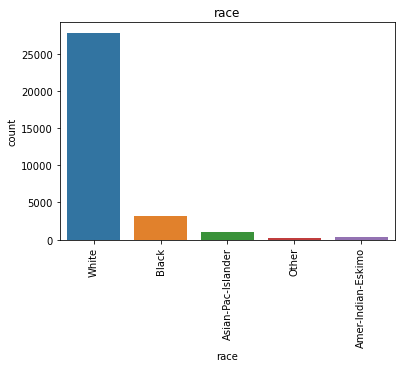

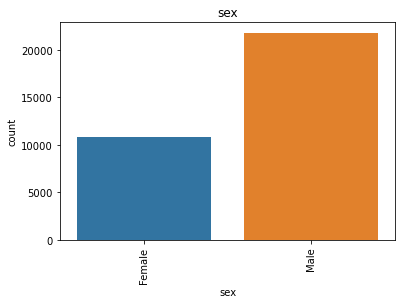

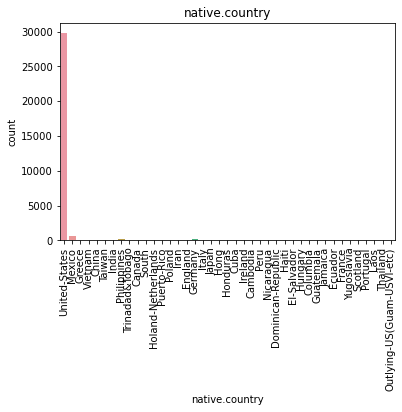

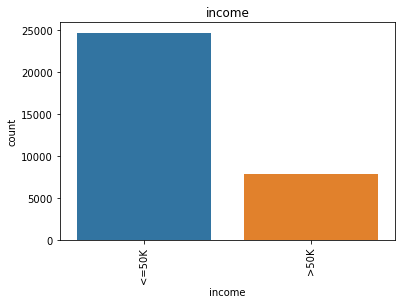

In [16]:
for i in cat_var:
  plt.title(i)
  sns.countplot(x=data_frame[i])
  
  plt.xticks(rotation=90)
  plt.show()

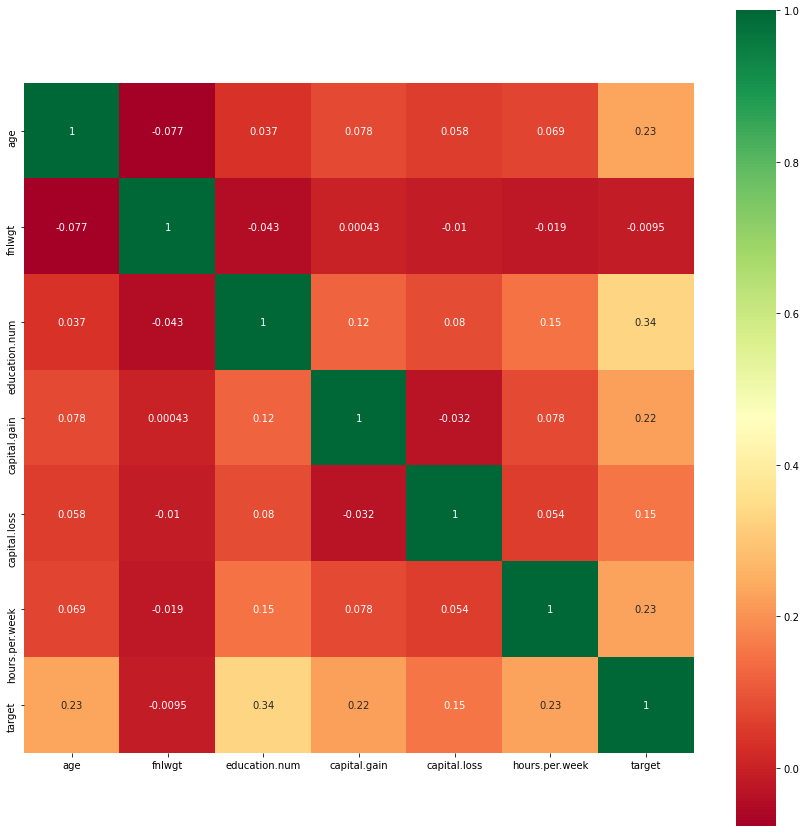

In [17]:
## Correlación de las variables
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
p=sns.heatmap(data_frame.corr(), annot=True,cmap='RdYlGn',square=True)

In [20]:
DF_nuevo = encode_onehot(data_frame, cols=['workclass','education','marital.status','occupation','relationship','race','sex','native.country'])
DF_nuevo.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,target,education=10th,education=11th,...,sex=Female,sex=Male,workclass=Federal-gov,workclass=Local-gov,workclass=Never-worked,workclass=Private,workclass=Self-emp-inc,workclass=Self-emp-not-inc,workclass=State-gov,workclass=Without-pay
0,90,77053,9,0,4356,40,<=50K,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,82,132870,9,0,4356,18,<=50K,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,66,186061,10,0,4356,40,<=50K,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,54,140359,4,0,3900,40,<=50K,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,41,264663,10,0,3900,40,<=50K,0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
X=DF_nuevo.drop(['target','income'], axis=1)
y=DF_nuevo['target']

from sklearn.model_selection import train_test_split


# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

# Define el algoritmo a utilizar Naive Bayes
from sklearn.naive_bayes import GaussianNB

modelo = GaussianNB()

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

# Validación del modelo
y_pred = modelo.predict(X_test)


In [22]:
# Evaluación del modelo
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# Se calcula la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:', precision)

Matriz de Confusión:
[[4652  259]
 [1120  482]]
Precisión del modelo: 0.650472334682861


In [23]:
from sklearn.feature_selection import SelectKBest
X=DF_nuevo.drop(['target','income'], axis=1)
y=DF_nuevo['target']

best=SelectKBest(k=5)
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['age', 'education.num', 'marital.status=Married-civ-spouse',
       'marital.status=Never-married', 'relationship=Husband'],
      dtype='object')


In [26]:
used_features = X.columns[selected]
X2 = DF_nuevo[used_features]
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state = 29)

modelo_x = GaussianNB()

# Entrenamiento del modelo
modelo_x.fit(X_train, y_train)

# Validación del modelo
y_pred = modelo_x.predict(X_test)

In [27]:
# Evaluación del modelo
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# Se calcula la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:', precision)

Matriz de Confusión:
[[3584 1327]
 [ 329 1273]]
Precisión del modelo: 0.4896153846153846


In [28]:
from sklearn.preprocessing import StandardScaler

X=DF_nuevo.drop(['target','income'], axis=1)
y=DF_nuevo['target']

sc = StandardScaler()

scaled_data = sc.fit_transform(X)
pd.DataFrame(scaled_data).head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,3.769612,-1.067997,-0.420060,-0.14592,10.593507,-0.035429,-0.171753,-0.193487,-0.116092,-0.072016,...,1.422331,-1.422331,-0.174295,-0.262097,-0.014664,0.57209,-0.188389,-0.290936,-0.203761,-0.02074
1,3.183112,-0.539169,-0.420060,-0.14592,10.593507,-1.817204,-0.171753,-0.193487,-0.116092,-0.072016,...,1.422331,-1.422331,-0.174295,-0.262097,-0.014664,0.57209,-0.188389,-0.290936,-0.203761,-0.02074
2,2.010110,-0.035220,-0.031360,-0.14592,10.593507,-0.035429,-0.171753,-0.193487,-0.116092,-0.072016,...,1.422331,-1.422331,-0.174295,-0.262097,-0.014664,0.57209,-0.188389,-0.290936,-0.203761,-0.02074
3,1.130359,-0.468215,-2.363558,-0.14592,9.461864,-0.035429,-0.171753,-0.193487,-0.116092,-0.072016,...,1.422331,-1.422331,-0.174295,-0.262097,-0.014664,0.57209,-0.188389,-0.290936,-0.203761,-0.02074
4,0.177296,0.709482,-0.031360,-0.14592,9.461864,-0.035429,-0.171753,-0.193487,-0.116092,-0.072016,...,1.422331,-1.422331,-0.174295,-0.262097,-0.014664,0.57209,-0.188389,-0.290936,-0.203761,-0.02074


In [36]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state = 29)

modelo_x = GaussianNB()

# Entrenamiento del modelo
modelo_x.fit(X_train, y_train)

# Validación del modelo
y_pred = modelo_x.predict(X_test)


In [37]:
# Evaluación del modelo
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# Se calcula la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:', precision)

Matriz de Confusión:
[[1671 3240]
 [  53 1549]]
Precisión del modelo: 0.32344957193568596


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Separar los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state = 29)

#modelo = DecisionTreeClassifier(random_state=29)
modelo = DecisionTreeClassifier(random_state=29,class_weight='balanced')

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

# Validación del modelo
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print('Precisión del modelo:', modelo.score(X_test, y_test))
print('Accuracy del modelo:', accuracy_score(y_test, y_pred))

Precisión del modelo: 0.8120681713496085
Accuracy del modelo: 0.8120681713496085


In [35]:
# Evaluación del modelo
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

# Se calcula la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:', precision)


Matriz de Confusión:
[[4306  605]
 [ 619  983]]
Precisión del modelo: 0.6190176322418136


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Se separan las variables predictoras y la predecida


X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, 
                                                    test_size=0.2, random_state=29)
# Tipo de modelo
modelo = LinearRegression()

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

# Validación del modelo
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print("R2 :%.2f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("Score del modelo : %.2f" % modelo.score(X_train, y_train))

R2 :0.37
MSE: 0.12
Score del modelo : 0.37
